# Visualizations in Julia
---
**Gregory Farage, Śaunak Sen**    

    gfarage@uthsc.edu / sen@uthsc.edu
    Division of Biostatistics
    Department of Preventive Medicine
    University of Tennessee Health Science Center
    Memphis, TN

Several plotting packages are available for Julia, each with unique features. Among them is Plots.jl, which stands out as it can interface with many other plotting packages such as [Plotly](https://github.com/JuliaPlots/PlotlyJS.jl) or [PythonPlot](https://github.com/stevengj/PythonPlot.jl)(*aka*, Matplotlib). This notebook focuses on two packages Plots.jl and StatsPlots.jl. Its primary aim is to give an overview of the terminology used in both plotting packages, provide instructions on how to use them for common tasks, and equip you with the necessary knowledge to easily navigate through the rest of the manual.    

`Makie.jl` is another powerful visualization package that should be mentioned; it is distinct from Plots.jl and has been around for a relatively shorter time that Plots.jl. Nonetheless, the Julia community values it highly for its beautiful graphics, and now that its reliability has improved, its use is becoming more widespread.
      
*References for this notebook:*
* [Plots.jl](https://docs.juliaplots.org/latest/tutorial/)
* [StatsPlots.jl](https://docs.juliaplots.org/latest/generated/statsplots/)
* [Makie.jl](https://docs.makie.org/stable/)
* [Introducing Julia/Plotting](https://en.wikibooks.org/wiki/Introducing_Julia/Plottin)
* [PlotsGallery.jl](https://github.com/goropikari/PlotsGallery.jl)

### Outline of this notebook

- Data example 
- Plots.jl
- StatsPlots.jl
- Visualize Results

In [1]:
# using Pkg
# Pkg.instantiate();

In [40]:
using Plots, StatsPlots , PlotThemes
using RData, DataFrames, Downloads 
using Statistics, CategoricalArrays, FreqTables

## Data
**Emergency department triage**    

This dataset has [short-term (30-day) mortality](https://datadryad.org/stash/dataset/doi:10.5061/dryad.m2bq5) from [Kristensen et. al.](https://sjtrem.biomedcentral.com/articles/10.1186/s13049-017-0458-x) as a function of different blood tests, age and sex. We will just look at the mortality as a function of age.

In [2]:
myurl = "https://datadryad.org/stash/downloads/file_stream/27091"
datafile = Downloads.download(myurl);
dataset = load(datafile) 

Dict{String, Any} with 1 entry:
  "data" => 6249×21 DataFrame…

The data is loaded as a Dictionary-type object that contains the dataframe. To extract the dataframe, we simply need to use the key paired with the dataframe: 

In [3]:
df = dataset["data"];
df = dropmissing(df);
# df.triage = CategoricalArray(df.triage)
df.age_cat = cut(df.age, [0, 25, 45, 55, 65, 75, 100])
first(df, 5)

5×22 DataFrame
 Row │ triage  age      sex     crp       k        na       hb       crea      ⋯
     │ Cat…    Float64  Cat…    Float64   Float64  Float64  Float64  Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ green      83.0  female  19.9135   4.25492  132.293      7.5  61.4602   ⋯
   2 │ yellow     86.0  female  76.2569   3.6      138.0        7.6  92.0
   3 │ yellow     84.0  female   2.3245   3.3      140.0        7.2  76.0
   4 │ green      26.0  male     1.27216  4.20976  139.203      8.8  98.0931
   5 │ green      16.0  male     1.0      4.97468  140.825      8.5  66.4501   ⋯
                                                              14 columns omitted

In [4]:
size(df)

(4545, 22)

In [5]:
combine(groupby(df, [:mort30]), nrow => :count) |> (x-> Int.(x))

2×2 DataFrame
 Row │ mort30  count 
     │ Int64   Int64 
─────┼───────────────
   1 │      0   4322
   2 │      1    223

[Data variables description](https://datadryad.org/stash/downloads/file_stream/27092):    
- "triage": Triage given upon arrival to ED. Class=factor. Green, yellow, orange, red.
- "age": Age, rounded to lower integer. Class=numeric   
- "sex": Class=factor. female/male  
- "crp": S-C-reactive protein. Unit: nmol/l  
- "k": S-Pottasium. Unit: mmol/L   
- "na": S-Sodium. Unit: mmol/L  
- "hb": S-haemoglobine. Unit: mmol/L
- "crea": S-creatinine. Unit: umol/L
- "leu": Blood leucocyte count. Unit: 10E9/L
- "alb": S-albumine. Unit: g/L
- "ldh": S-Lactate dehydrogenasis. Unit: U/L
- "mort30": 30-day survival. Class=factor: 0=Survived >30 days. 1= dead within 30 days.
- "icutime": Number of days on Intensive Care Unit. 99999=not admitted to ICU
- "icustatus": Class=factor. admitted to ICU yes/no. 0=no, 1=yes
- "inddage": Number of days admitted to hospital
- "genindl.1": Class=factor. Readmitted within 30 days yes/no. 1=yes, 0=no            
- "saturation": Peripheral arterial oxygen saturation. Unit: %.           
- "respirationsfrekvens": Respiratory rate. Unit: /min
- "puls": Heart rate. Unit: /min                 
- "systoliskblodtryk": Systolic blood pressure. Unit: mmHg    
- "gcs": Glascow coma score.  

## Plots.jl
When choosing a visualization library from the Julia ecosystem, Plots.jl is commonly seen as the standard plotting tool. The Plots package is a high-level plotting interface that allows you to use various [back-end](https://docs.juliaplots.org/stable/backends/) plotting packages as the graphics engine, such as: 
* `GR`
* `PythonPlot`
* `Plotly`
* `PGFFPlotsX`
* `UnicodePlots`
* `Gaston`
* `InspectDR`    
This makes it easier for us to generate consistent graphics without learning each back-end plotting package separately. If desired, each of these back-ends can still be used independently. 
`Plots.jl` uses by default `GR` backend.

In [6]:
gr()

Plots.GRBackend()

### Plots

In [7]:
f(x) = x^3

f (generic function with 1 method)

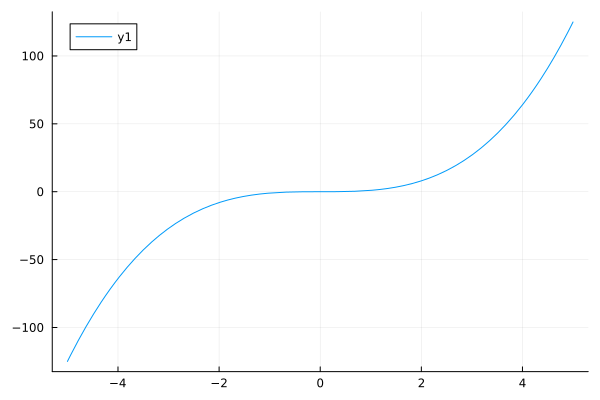

In [8]:
plot(f)

`PlotThemes` is a package that can be used to enhance the aesthetic appeal of plots created with `Plots.jl`. The list of available theme can be found [here](https://docs.juliaplots.org/stable/generated/plotthemes/#Using-PlotThemes). 

In [9]:
theme(:default)

### Histogram

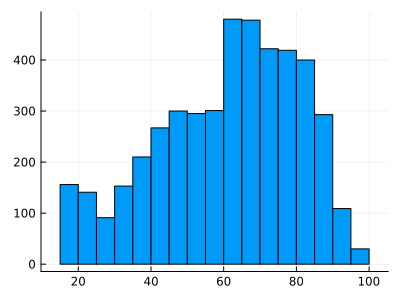

In [38]:
Plots.histogram(df.age, 
    # bins = range(minimum(df.age), stop = maximum(df.age), length = 30),
    legend = false,
    size = (400,300)
)

### Bar

In [11]:
tbl_triage = combine(groupby(df, [:triage]), nrow => :count);

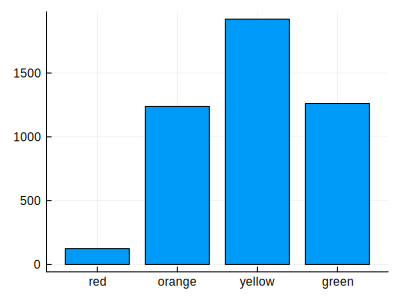

In [42]:
Plots.bar(tbl_triage.count,
    xticks = (1:4, tbl_triage.triage),
    # color=[:red, :orange, :yellow, :green],
    legend = false,
    fontfamily = "Helvetica",
    size = (400, 300)
)

### Heatmap

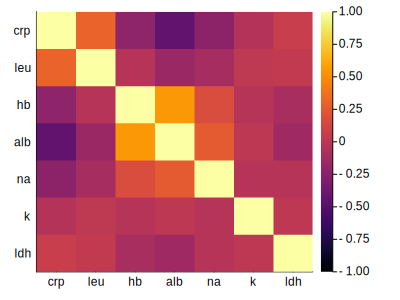

In [13]:
col_var = ["crp", "leu", "hb", "alb",  "na", "k", "ldh"]
mCor = cor(Matrix(df[!,col_var]));
Plots.heatmap(mCor[end:-1:1, :],
    xticks = (1:length(col_var), col_var),
    yticks = (1:length(col_var), reverse(col_var)),
    # color = :RdBu,
    clims = (-1, 1),
    fontfamily = "Helvetica",
    right_margin = (10, :mm),
    size = (400, 300)
)

Catalog for color schemes can be found [here](https://juliagraphics.github.io/ColorSchemes.jl/stable/catalogue/) 

### Scatter

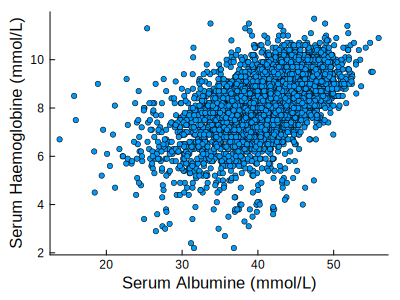

In [14]:
Plots.scatter(
    df.alb, 
    df.hb,
    xlabel = "Serum Albumine (mmol/L)",
    ylabel = "Serum Haemoglobine (mmol/L)",
    fontfamily = "Helvetica",
    markersize = 3,
    grid = false,
    legend = false,
    # group = cut(df.age, [0, 20, 30, 40, 50, 60, 70], extend = true),
    size = (400, 300)
)

The documentation of `Plots.jl` is thorough and user-friendly, making it easy for users to find what they need. For example, a comprehensive list of plotting attributes can be found [here](https://docs.juliaplots.org/stable/attributes/).

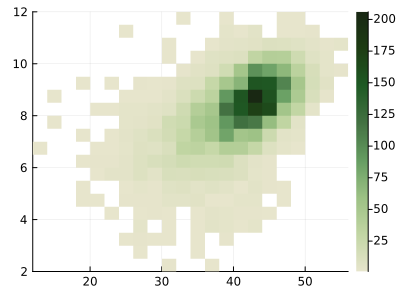

In [15]:
histogram2d(
    df.alb, 
    df.hb,
    colormap = :VanGogh3,
    size = (400, 300)
)

## StatsPlots.jl

### Corrplot

In [36]:
@df df corrplot([:crp :hb :crea :alb ], 
    grid = false,
)

### Grouped Histogram

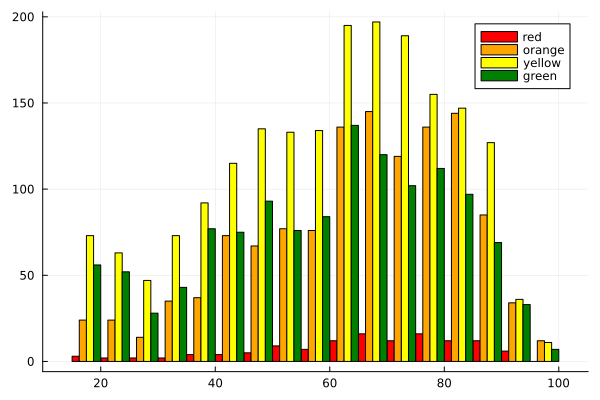

In [17]:
@df df groupedhist(:age, group =:triage,
    color=[:red :orange :yellow :green],
) 

### Violin Plot

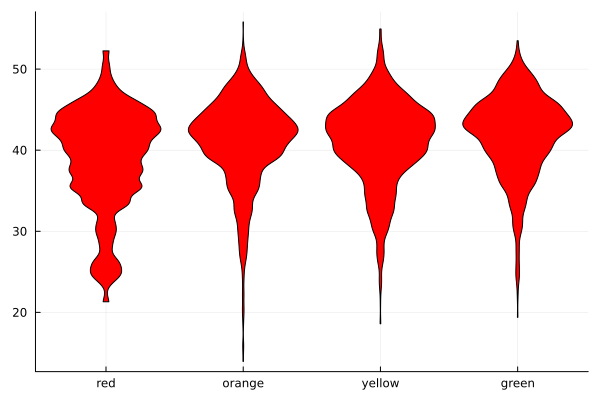

In [29]:
@df df violin(
    :triage,
    :alb,
    legend = false,
    linewidth = 1,
    color=[:red :orange :yellow :green],
)

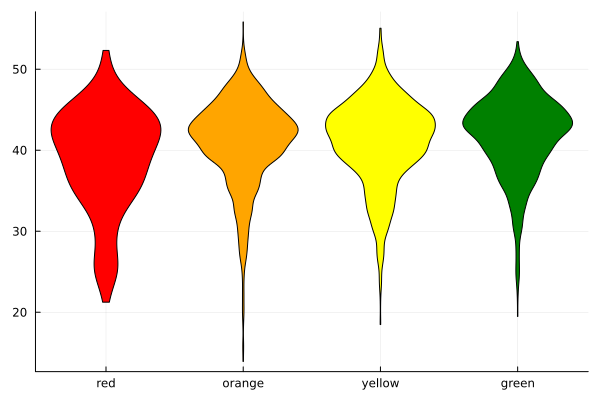

In [30]:
gdf = select(df, [:triage, :alb]) |> x -> groupby(x, :triage);
tupleData = map(i -> gdf[i].alb, 1:4)

violin(
    tupleData,
    xticks = (1:4, ["red", "orange", "yellow", "green"]),
    legend = false,#:outertopright,
    color=[:red :orange :yellow :green],
    label=["red" "orange" "yellow" "green"],
)

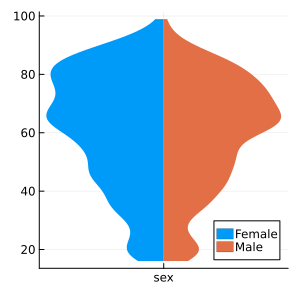

In [20]:
gdf = select(df, [:age, :sex]) |> x -> groupby(x, :sex);
gdf[1].X = repeat(["sex"], size(gdf[1],1))
gdf[2].X = repeat(["sex"], size(gdf[2],1))
@df gdf[1] violin(:X, :age, side=:left, linewidth=0, label = "Female")
@df gdf[2] violin!(:X, :age, side=:right, linewidth=0, label = "Male", size = (300,300))

### Density plot

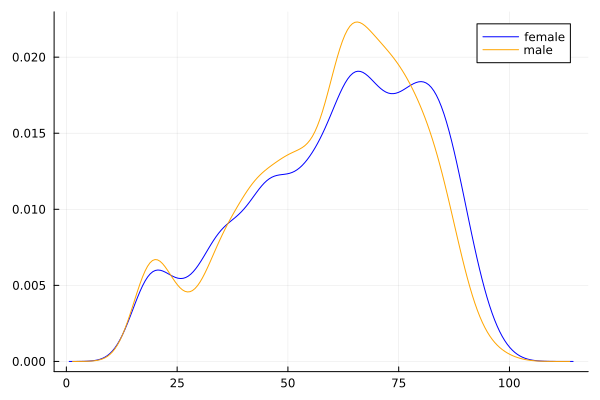

In [21]:
@df df density(:age, group = :sex, color = [:blue :orange])

In [22]:
versioninfo()

Julia Version 1.8.5
Commit 17cfb8e65e (2023-01-08 06:45 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 8 × 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, tigerlake)
  Threads: 1 on 8 virtual cores


## Summary

- Plots.jl is a powerful and flexible plotting package that provides a common interface for various plotting backends, including GR, Plotly, and PyPlot. One of the main benefits of Plots.jl is its simplicity and ease of use, making it a great option for users with minimal experience in creating visualizations.
- StatsPlots.jl builds on top of Plots.jl and provides a set of specialized plot types and functionalities specifically designed for statistical data analysis. 

## Exercise - Visualization

#### Ex.1: Histogram

Plot the histogram of the haemoglobine (**hb**)

#### Ex.2: Scatter plot

Make a scatter plot of the creatinine (**crea**) versus albumine (**alb**).

#### Ex.3 Shapes of the markers

Change the shape of the markers in the scatter plot

(hint: [list of attributes - here](https://docs.juliaplots.org/latest/generated/attributes_series/), look at `markershape`)